In [ ]:
pip install colour-science

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.1 MB/s eta 0:00:00


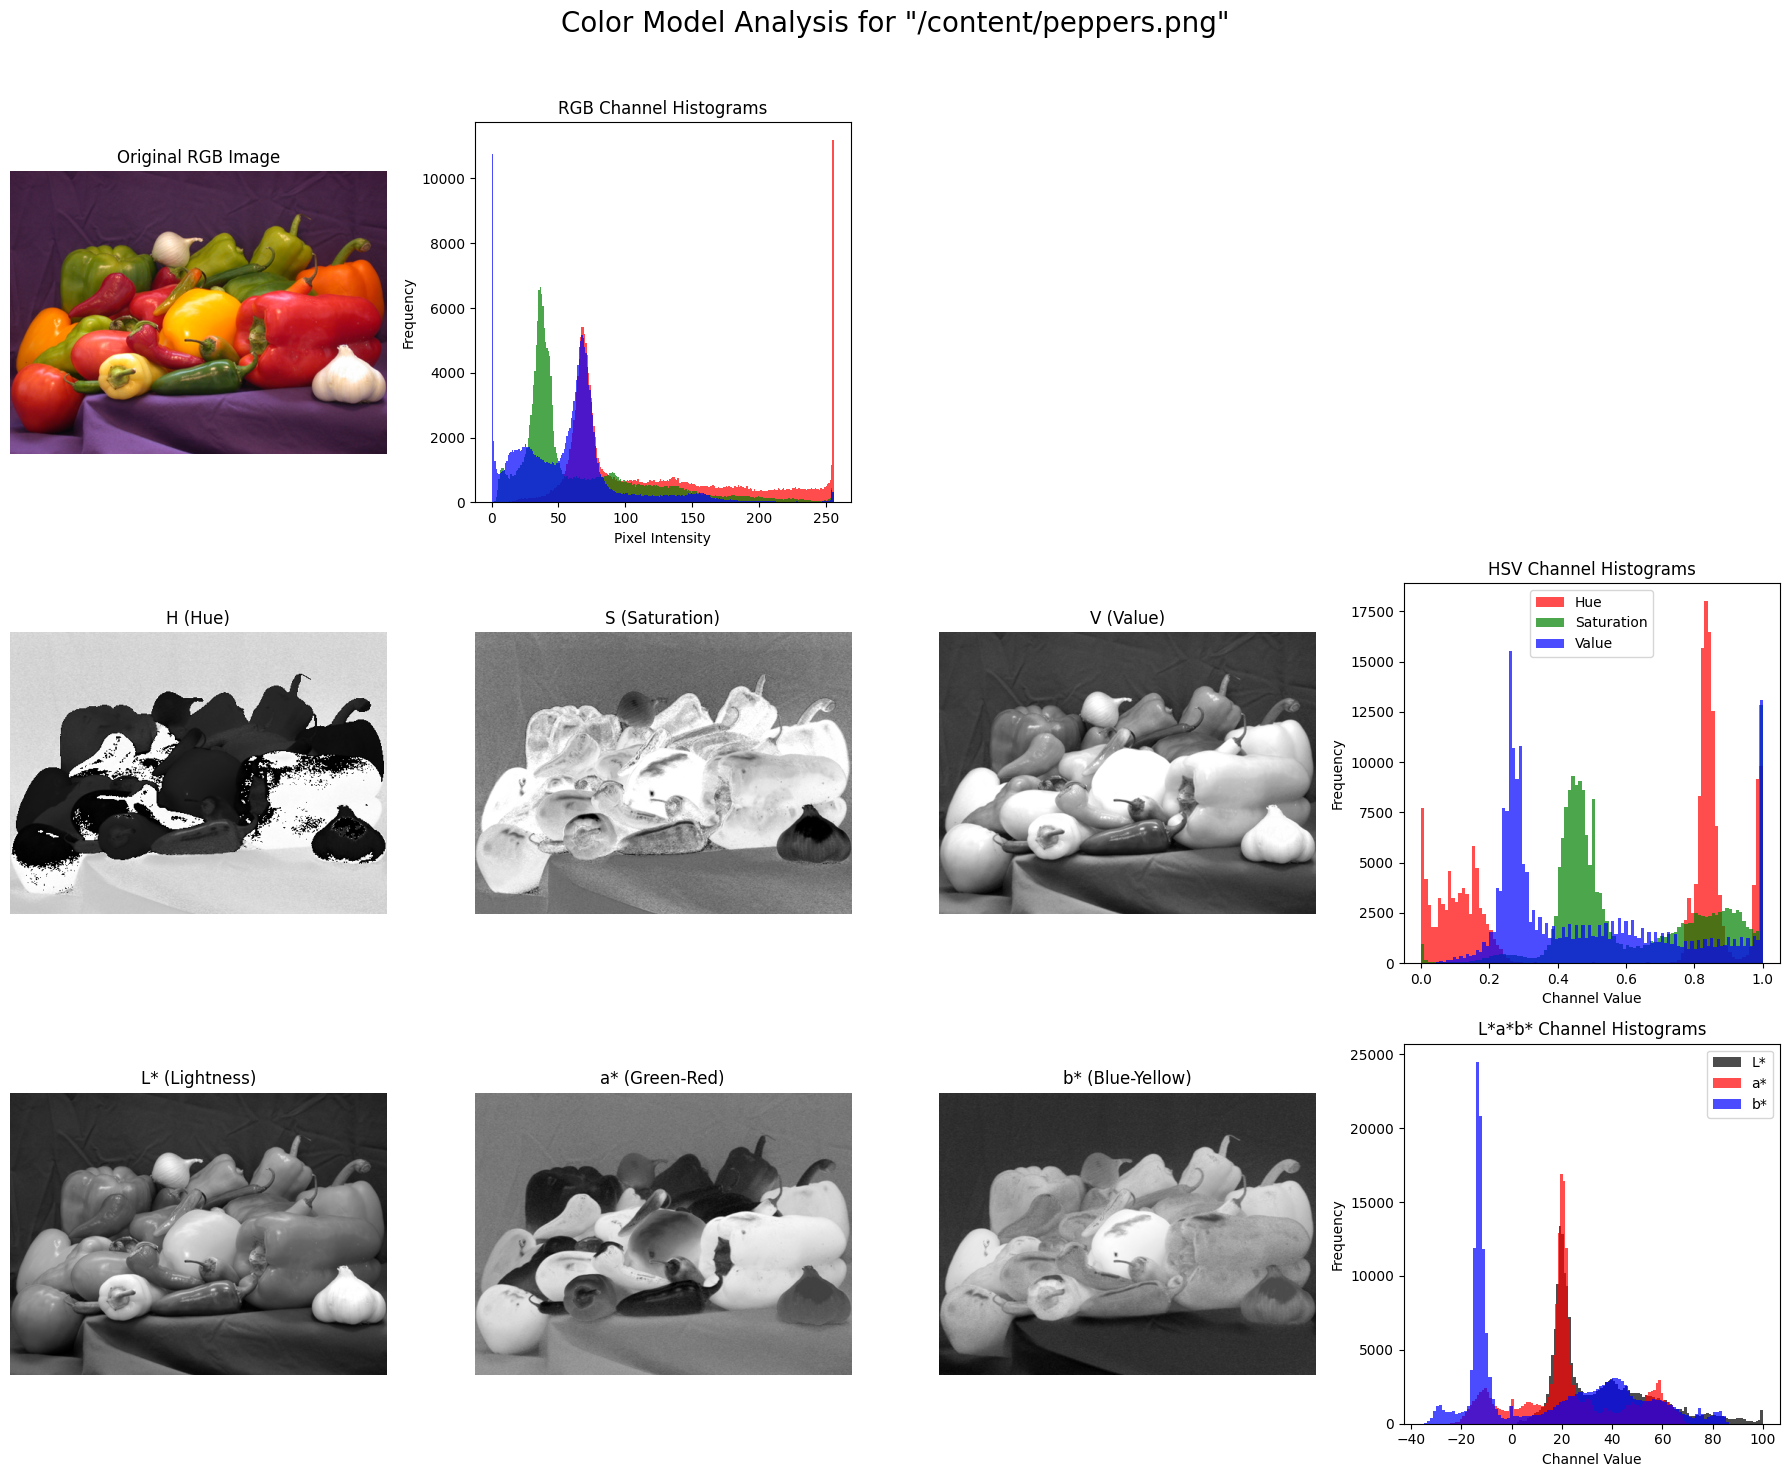

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import color

def analyze_image_color_models(image_path):
        image_uint8 = iio.imread(image_path)
        # Remove alpha channel if present
        if image_uint8.shape[-1] == 4:
            image_uint8 = image_uint8[..., :3]

        image_float = image_uint8.astype(np.float32) / 255.0
        image_hsv = color.rgb2hsv(image_float)
        image_lab = color.rgb2lab(image_float)
        fig = plt.figure(figsize=(18, 16))
        plt.suptitle(f'Color Model Analysis for "{image_path}"', fontsize=20, y=0.95)
        ax1 = plt.subplot(3, 4, 1)
        ax1.imshow(image_float)
        ax1.set_title('Original RGB Image')
        ax1.axis('off')
        ax2 = plt.subplot(3, 4, 2)
        ax2.set_title('RGB Channel Histograms')
        for i, col in enumerate(['Red', 'Green', 'Blue']):
            hist_data = image_uint8[..., i].flatten()
            ax2.hist(hist_data, bins=256, range=(0, 256), color=col.lower(), alpha=0.7)
        ax2.set_xlabel('Pixel Intensity')
        ax2.set_ylabel('Frequency')
        hsv_channels = {'H (Hue)': image_hsv[..., 0], 'S (Saturation)': image_hsv[..., 1], 'V (Value)': image_hsv[..., 2]}
        for i, (name, channel_data) in enumerate(hsv_channels.items(), start=5):
            ax = plt.subplot(3, 4, i)
            ax.imshow(channel_data, cmap='gray')
            ax.set_title(name)
            ax.axis('off')
        ax_hsv_hist = plt.subplot(3, 4, 8)
        ax_hsv_hist.set_title('HSV Channel Histograms')
        for i, (name, col) in enumerate(zip(['Hue', 'Saturation', 'Value'], ['red', 'green', 'blue'])):
            hist_data = image_hsv[..., i].flatten()
            ax_hsv_hist.hist(hist_data, bins=100, color=col, alpha=0.7, label=name)
        ax_hsv_hist.set_xlabel('Channel Value')
        ax_hsv_hist.set_ylabel('Frequency')
        ax_hsv_hist.legend()
        lab_channels = {'L* (Lightness)': image_lab[..., 0], 'a* (Green-Red)': image_lab[..., 1], 'b* (Blue-Yellow)': image_lab[..., 2]}
        for i, (name, channel_data) in enumerate(lab_channels.items(), start=9):
            ax = plt.subplot(3, 4, i)
            ax.imshow(channel_data, cmap='gray')
            ax.set_title(name)
            ax.axis('off')
        ax_lab_hist = plt.subplot(3, 4, 12)
        ax_lab_hist.set_title('L*a*b* Channel Histograms')
        for i, (name, col) in enumerate(zip(['L*', 'a*', 'b*'], ['black', 'red', 'blue'])):
             hist_data = image_lab[..., i].flatten()
             ax_lab_hist.hist(hist_data, bins=100, color=col, alpha=0.7, label=name)
        ax_lab_hist.set_xlabel('Channel Value')
        ax_lab_hist.set_ylabel('Frequency')
        ax_lab_hist.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.93])
        plt.show()
dummy_image_path = '/content/peppers.png'
analyze_image_color_models(dummy_image_path)